<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_5_Data_Visualize_ti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
Vẽ nhiều đồ thị trên cùng một hình

# 0. Import các thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#1. Chuẩn bị dữ liệu
- Sử dụng dữ liệu từ kaggle
- Chọn các cột cần thiết trong dữ liệu thu thập được

In [1]:
df = pd.read_csv("https://raw.githubusercontent.com/hainmit09/DataAnalysis/main/supermarket_sales%20-%20Sheet1.csv")

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Loại bỏ các cột không cần thiết

In [ ]:
df = df[['Product line', 'Date', 'Total', 'Payment']]

In [ ]:
df.head()

,Product line,Date,Total,Payment
0,Health and beauty,1/5/2019,548.9715,Ewallet
1,Electronic accessories,3/8/2019,80.2200,Cash
2,Home and lifestyle,3/3/2019,340.5255,Credit card
3,Health and beauty,1/27/2019,489.0480,Ewallet
4,Sports and travel,2/8/2019,634.3785,Ewallet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product line  1000 non-null   object 
 1   Date          1000 non-null   object 
 2   Total         1000 non-null   float64
 3   Payment       1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


Chuyển đổi Date từ object sang datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Time'] = pd.to_datetime(df['Time'])


# Tạo thêm 2 cột Month và Year để dễ thao tác

In [ ]:
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

Xem thông tin giá trị của Năm, Tháng và Dòng sản phẩm

In [ ]:
df['Year'].unique()

array([2019])

In [ ]:
df['Month'].unique()

array([1, 3, 2])

In [ ]:
product_line=df['Product line'].unique()

In [ ]:
product_line

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

# Tính tổng giá trị sản phầm bán được theo [Dòng sản phẩm, theo tháng]

In [ ]:
month_df = df[['Product line', 'Month', 'Total']]

In [ ]:
month_df = month_df.groupby(['Product line', 'Month']).sum()

In [ ]:
month_df.head()

Total
Product line           Month            
Electronic accessories 1      18831.2880
                       2      17362.9050
                       3      18143.3385
Fashion accessories    1      19345.1160
                       2      19009.8615

In [ ]:
month_df.reset_index(inplace=True)

In [ ]:
month_df.head(7)

,Product line,Month,Total
0,Electronic accessories,1,18831.2880
1,Electronic accessories,2,17362.9050
2,Electronic accessories,3,18143.3385
3,Fashion accessories,1,19345.1160
4,Fashion accessories,2,19009.8615
5,Fashion accessories,3,15950.9175
6,Food and beverages,1,19570.5300


In [ ]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product line  18 non-null     object 
 1   Month         18 non-null     int64  
 2   Total         18 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


# Chuyển đổi index (cặp: Product line, Month
Sử dụng hàm reset_index của dataframe

In [ ]:
month_df.reset_index(inplace=True)

In [ ]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18 non-null     int64  
 1   Product line  18 non-null     object 
 2   Month         18 non-null     int64  
 3   Total         18 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 704.0+ bytes


In [ ]:
month_df.head()

,index,Product line,Month,Total
0,0,Electronic accessories,1,18831.2880
1,1,Electronic accessories,2,17362.9050
2,2,Electronic accessories,3,18143.3385
3,3,Fashion accessories,1,19345.1160
4,4,Fashion accessories,2,19009.8615


Thứ tự tháng chưa đúng cần sắp xếp lại

In [ ]:
month_df = month_df.sort_values(by=['Month'])

In [ ]:
month_df['Month'].unique()

array([1, 2, 3])

# Thông kê lượng tiền qua các hình thức thanh toán.

In [ ]:
payment_df=df[['Payment', 'Total']]

In [ ]:
payment_df = payment_df.groupby(['Payment']).sum()

In [ ]:
payment_df.head()

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


In [ ]:
payment_df.reset_index(inplace=True)

In [ ]:
payment_df.head()

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


In [ ]:
month_df['Month'].unique()

array([1, 2, 3])

#2. Vẽ nhiều đồ thị trên cùng một hình, cùng một hệ trụ tọa độ
**Điều kiện: Cùng tập dữ liệu X

In [ ]:
product_line

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

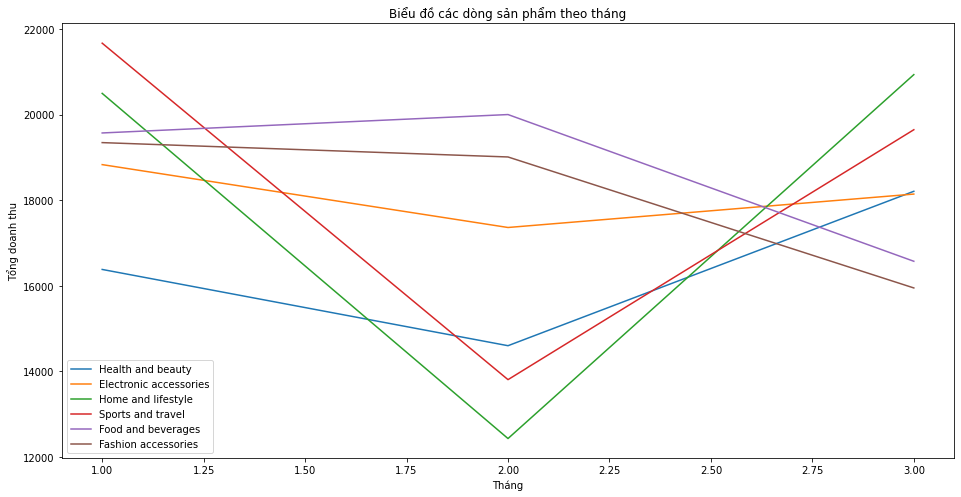

In [ ]:

plt.figure(figsize = (16,8))

for pl in product_line:  
  df_p = month_df.loc[month_df['Product line'] == pl, :]
  x = df_p['Month'].astype(int)
  y = df_p['Total']  
  plt.plot(x, y, label = pl)

plt.title("Biểu đồ các dòng sản phẩm theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.legend()
plt.show()

#Vẽ nhiều đồ thị trên cùng một hình, với các hệ trục khác nhau
Nguyên lý: Sửa dụng hàm fig, ax = plt.subplots(r, c) để tạo các đồ thị con, và vẽ trong từng đồ thị đó:
- r: số dòng của đồ thị
- c: số cột của đồ thị


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0, 'Tháng')

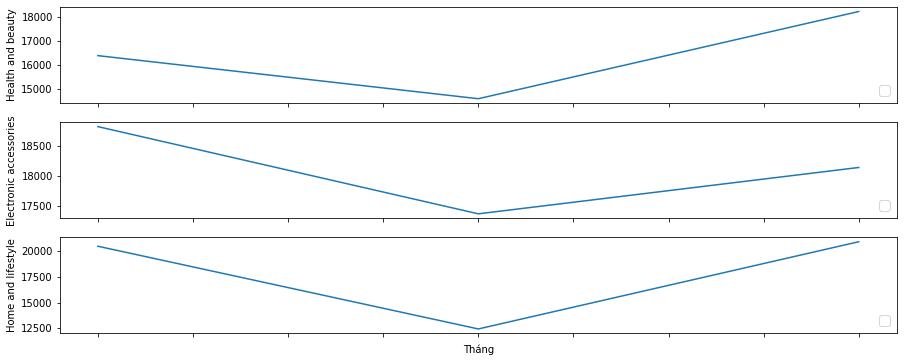

In [ ]:

fig, ax = plt.subplots(3, 1)
# fig.figure(figsize=(16,9))
# plt.figure(figsize=(16,9))
fig.set_figheight(6)
fig.set_figwidth(15)

for idx in range(3):
  pl = product_line[idx]
  df_p = month_df.loc[month_df['Product line'] == pl, :]
  x = df_p['Month']
  y = df_p['Total'] 
  ax[idx].plot(x, y)
  ax[idx].set_ylabel(pl,)
  ax[idx].set_xticklabels([])
  ax[idx].legend(fontsize = 14, loc = 'lower right')
plt.xlabel("Tháng")

Không dùng vòng lặp

In [ ]:
pl = 'Health and beauty' # pl = product_line[0]
df_p = month_df.loc[month_df['Product line'] == pl]
x = df_p['Month']
y = df_p['Total'] 


# Vẽ đồ thị trên cùng một dòng

In [ ]:
len(product_line)

6

([<matplotlib.patches.Wedge at 0x7fbe03b79810>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281990729895882, -0.9648863867279608, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.2881085852670481, -0.5263016654879785, '34.1%')])

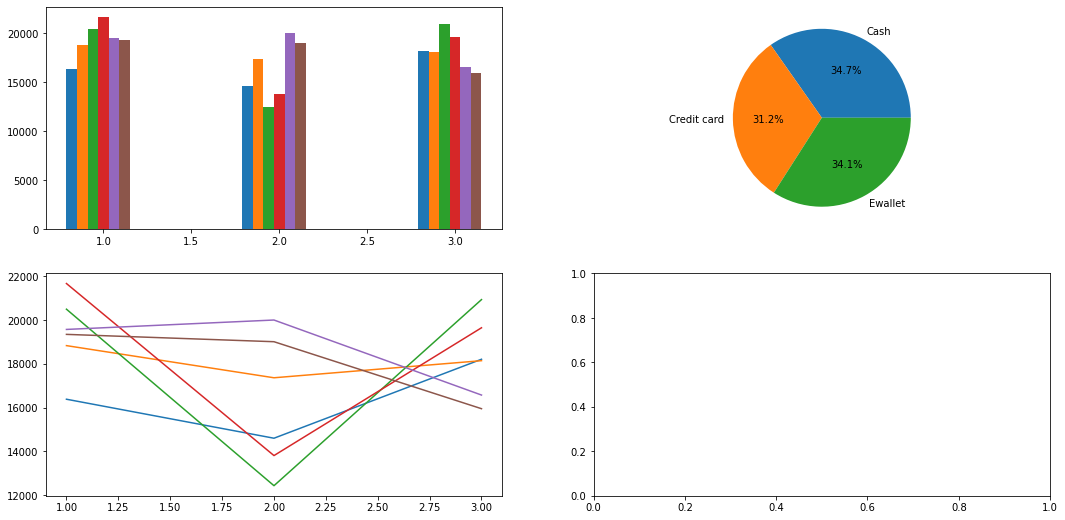

In [ ]:
fig, ax = plt.subplots(2, 2)
# fig.figure(figsize=(16,9))
# plt.figure(figsize=(16,9))
fig.set_figheight(9)
fig.set_figwidth(18)
# Tổng số dòng sản phầm
c = len(product_line)
# Vẽ doanh thu dòng sản phẩm them cột
for idx in range(c):
  pl = product_line[idx]
  df_p = month_df.loc[month_df['Product line'] == pl]
  x = df_p['Month']
  y = df_p['Total'] 
  bar_width=0.06
  ax[0, 0].bar(x + (idx-3)*bar_width, y, width=bar_width, align='center')

# Vẽ đồ thị dạng đường cho ô trái bên dưới

for pl in product_line:  
  df_p = month_df.loc[month_df['Product line'] == pl, :]
  x = df_p['Month'].astype(int)
  y = df_p['Total']  
  ax[1, 0].plot(x, y, label = pl)

# Vẽ biểu đồ tròn mô phỏng tỷ trọng thanh toán
ax[0, 1].pie(payment_df['Total'], labels = payment_df['Payment'], autopct='%1.1f%%')


# Vẽ một đồ thị con trong đồ thị lớn
